## Create the Training Atlas

In [17]:
from os import listdir
from os.path import isdir, join
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Set path to labels folder and import transformed labels into python
data_dir = "./registered-data/Training_Set/labels/"
onlydirs = [f for f in listdir(data_dir) if isdir(join(data_dir, f))]

# Key the labels already in the files
CSF_label = 1
GM_label = 3
WM_label = 2


CSF_im = None

# Import each label and create a label maps
for dir in onlydirs:
    labels = join(data_dir, dir,'result.nii.gz')
    labels_img = nib.load(labels)
    labels_data = labels_img.get_data()
    
    if CSF_im is None:
        # Array definitions to store the label counts
        CSF_im = np.zeros_like(labels_data)
        WM_im = np.zeros_like(labels_data)
        GM_im = np.zeros_like(labels_data)
        temp_CSF_im = np.zeros_like(labels_data)
        temp_WM_im = np.zeros_like(labels_data)
        temp_GM_im = np.zeros_like(labels_data)
    
    #Assign CSF to 1
    temp_CSF_im[labels_data == CSF_label] = 1
    #Assign GM to 2
    temp_GM_im[labels_data == GM_label] = 1
    #Assign WM to 1
    temp_WM_im[labels_data == WM_label] = 1
    
    CSF_im = CSF_im + temp_CSF_im
    GM_im = GM_im + temp_GM_im
    WM_im = WM_im + temp_WM_im
    
# For each array, count the occurences and find the probability
tot_im = CSF_im + GM_im + WM_im
print(tot_im.shape)
CSF_probs = np.divide(CSF_im, tot_im)
CSF_probs = np.nan_to_num(CSF_probs)
GM_probs = np.divide(GM_im, tot_im)
GM_probs = np.nan_to_num(GM_probs)
WM_probs = np.divide(WM_im, tot_im)
WM_probs = np.nan_to_num(WM_probs)

(182, 218, 182)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


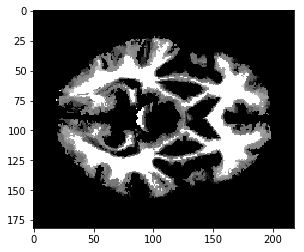

In [19]:
plt.imshow(GM_probs[:,:,75], cmap = "gray")
plt.show()

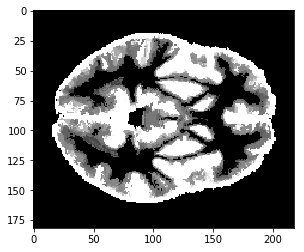

In [20]:
plt.imshow(WM_probs[:,:,75], cmap = "gray")
plt.show()

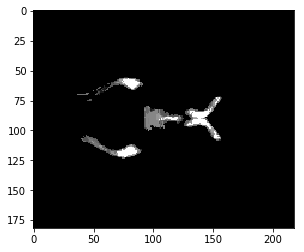

In [21]:
plt.imshow(CSF_probs[:,:,75], cmap = "gray")
plt.show()

In [22]:
# Save 3 atlases
GM_nii = nib.Nifti1Image(GM_probs, labels_img.affine, labels_img.header)
nib.save(GM_nii, './atlases/No-matching/GM_probs.nii.gz')
WM_nii = nib.Nifti1Image(WM_probs, labels_img.affine, labels_img.header)
nib.save(WM_nii, './atlases/No-matching/WM_probs.nii.gz')
CSF_nii = nib.Nifti1Image(CSF_probs, labels_img.affine, labels_img.header)
nib.save(CSF_nii, './atlases/No-matching/CSF_probs.nii.gz')